In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import datetime as dt

In [74]:
data=pd.read_csv("gdp.csv")
data.tail(15)

,Date,GdpPakistan,Per Capita,Annual Per Change
45,12/31/2005,120.055292,748.9226,6.5188
46,12/31/2006,137.264061,836.8605,5.8990
47,12/31/2007,152.385716,908.0951,4.8328
48,12/31/2008,170.077814,990.8466,1.7014
49,12/31/2009,168.152775,957.9957,2.8317
50,12/31/2010,177.165635,987.4097,1.6067
51,12/31/2011,213.587413,1164.9761,2.7484
52,12/31/2012,224.383621,1198.1090,3.5070
53,12/31/2013,231.218567,1208.9043,4.3965
54,12/31/2014,244.360889,1251.1641,4.6747


In [75]:
data['year'] = pd.DatetimeIndex(data['Date']).year

In [76]:
x = np.array(data['year']).reshape((-1, 1))
y = np.array(data['GdpPakistan'])

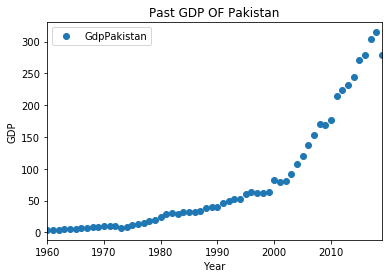

In [77]:
data.plot(x='year', y='GdpPakistan', style='o')  
plt.title('Past GDP OF Pakistan')  
plt.xlabel('Year')  
plt.ylabel('GDP')  
plt.show()

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [79]:
X_test

array([[1986],
       [1995],
       [2019],
       [1988],
       [1971],
       [1962],
       [1994],
       [2018],
       [2000],
       [1982],
       [1964],
       [1970]], dtype=int64)

In [80]:
model = LinearRegression().fit(X_train, y_train)
r_sq = model.score(X_train, y_train)
print('coefficient of determination: r_sq=', r_sq)

coefficient of determination: r_sq= 0.7814748610241411


In [81]:
print('intercept:', model.intercept_)

intercept: -8784.264731084662


In [82]:
print('slope:', model.coef_)

slope: [4.4545227]


In [83]:
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 62.41735865 102.50806298 209.41660787  71.32640406  -4.40048191
 -44.49118624  98.05354028 204.96208517 124.7806765   44.59926783
 -35.58214083  -8.85500461]


In [84]:
df = pd.DataFrame({'Year': X_test.flatten() ,'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Year,Actual,Predicted
0,1986,31.899070,62.417359
1,1995,60.636022,102.508063
2,2019,278.221906,209.416608
3,1988,38.472743,71.326404
4,1971,10.665897,-4.400482
5,1962,4.310164,-44.491186
6,1994,52.293457,98.053540
7,2018,314.567542,204.962085
8,2000,82.017743,124.780677
9,1982,30.725972,44.599268


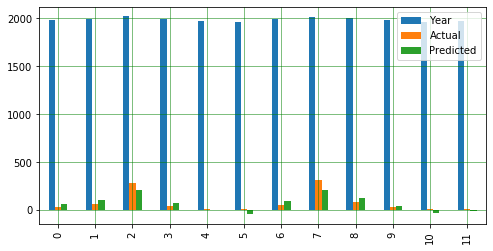

In [85]:
df.plot(kind='bar',figsize=(8,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

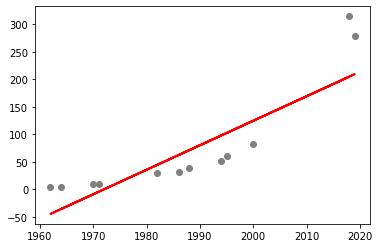

In [86]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [87]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 42.46569975862683
Mean Squared Error: 2437.9456715058527
Root Mean Squared Error: 49.37555742982405


In [88]:
x_new=np.array([2020, 2021, 2022, 2023, 2024, 2025]).reshape((-1, 1))
print(x_new)

[[2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]]


In [89]:
y_new = model.predict(x_new)
print(y_new)

[213.87113058 218.32565328 222.78017599 227.23469869 231.68922139
 236.1437441 ]


In [90]:
#so i conclude that data is not so good to pridict well so 

## i use here polynomilal regression

In [91]:
from sklearn.preprocessing import PolynomialFeatures

In [92]:
poly_reg=PolynomialFeatures(degree=3)

In [93]:
x_poly=poly_reg.fit_transform(X_train)

In [94]:
x_poly

array([[1.00000000e+00, 1.99000000e+03, 3.96010000e+06, 7.88059900e+09],
       [1.00000000e+00, 2.00100000e+03, 4.00400100e+06, 8.01200600e+09],
       [1.00000000e+00, 1.99300000e+03, 3.97204900e+06, 7.91629366e+09],
       [1.00000000e+00, 2.00300000e+03, 4.01200900e+06, 8.03605403e+09],
       [1.00000000e+00, 2.00900000e+03, 4.03608100e+06, 8.10848673e+09],
       [1.00000000e+00, 1.96700000e+03, 3.86908900e+06, 7.61049806e+09],
       [1.00000000e+00, 1.97400000e+03, 3.89667600e+06, 7.69203842e+09],
       [1.00000000e+00, 1.99200000e+03, 3.96806400e+06, 7.90438349e+09],
       [1.00000000e+00, 2.01000000e+03, 4.04010000e+06, 8.12060100e+09],
       [1.00000000e+00, 1.98900000e+03, 3.95612100e+06, 7.86872467e+09],
       [1.00000000e+00, 2.00200000e+03, 4.00800400e+06, 8.02402401e+09],
       [1.00000000e+00, 2.01400000e+03, 4.05619600e+06, 8.16917874e+09],
       [1.00000000e+00, 1.97800000e+03, 3.91248400e+06, 7.73889335e+09],
       [1.00000000e+00, 2.01600000e+03, 4.06425600e

In [95]:
lin_reg2=LinearRegression().fit(x_poly, y_train)

In [96]:
r_sq = lin_reg2.score(x_poly, y_train)
print('coefficient of determination: r_sq=', r_sq)

coefficient of determination: r_sq= 0.9929499456519343


In [ ]:
y_pred = lin_reg2.predict(poly_reg.fit_transform(X_test))
print('predicted response:', y_pred, sep='\n')

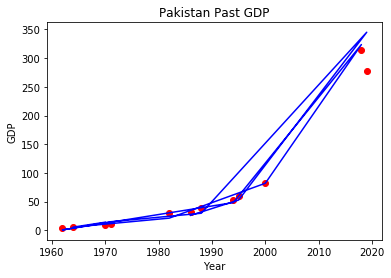

In [99]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, lin_reg2.predict(poly_reg.fit_transform(X_test)), color='blue')
plt.title("Pakistan Past GDP")
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [100]:
x_new=np.array([2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]).reshape((-1, 1))
print(x_new)

[[2018]
 [2019]
 [2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]]


In [101]:
y_new=lin_reg2.predict(poly_reg.fit_transform(x_new))
print(y_new)

[323.75210554 345.21672593 367.68226393 391.17200562 415.70923713
 441.31724464 468.01931423 495.83873207]


In [103]:
df = pd.DataFrame({'Year': X_test.flatten() ,'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Year,Actual,Predicted
0,1986,31.899070,26.024522
1,1995,60.636022,52.760985
2,2019,278.221906,345.216726
3,1988,38.472743,29.740954
4,1971,10.665897,14.926286
5,1962,4.310164,0.680942
6,1994,52.293457,48.332547
7,2018,314.567542,323.752106
8,2000,82.017743,81.999654
9,1982,30.725972,21.195071
